In [1]:
import scipy.signal as sig
import numpy as np
from scipy.fftpack import fft, ifft, fftshift
from __future__ import division
from ipywidgets import *
import matplotlib.pyplot as plt

def mov_avg (signal, MVSIZE):
    avg = np.zeros(len(signal))
    for n in range(len(avg)):
        sum = 0
        d = 0
        for k in range (-(MVSIZE), MVSIZE):
            if ((n-k) > 0) and ((n-k) < (len(signal))):
                sum = sum + signal[(n-k)]
                d = d+1
        avg[n] = sum/d
    return avg

N = 100
ones = np.ones(1)
zeros = np.zeros(int(N/2))

dirac = np.concatenate((zeros, ones, zeros), axis=0)

def plt_signal(M):
    spec = abs(fft(mov_avg(dirac,M)))
    f = np.arange(0, 0.5, 1/(N))
    plt.figure(1)
    plt.stem(f,spec[0:int(N/2)])
    plt.show()



interact(plt_signal, M=(2,80,2))



interactive(children=(IntSlider(value=40, description='M', max=80, min=2, step=2), Output()), _dom_classes=('w…

<function __main__.plt_signal(M)>

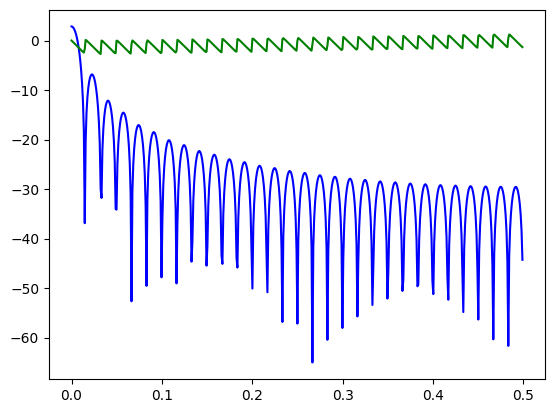

In [2]:
dirac2 = np.concatenate((zeros[0:30],ones,zeros[0:30]), axis=0)
b = mov_avg(dirac2,30)

w, h = sig.freqz(b)
plt.plot(w/(2*np.pi), 20 * np.log10(abs(h)), 'b')
angles = np.unwrap(np.angle(h))
plt.plot(w/(2*np.pi), angles, 'g')